In [10]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
rcParams['figure.figsize'] = 80,50

In [11]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

labelsTrain = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = ["img_name"  , "smiling"]
labelsTrain = labelsTrain.astype({'smiling': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/labels.csv')

labelsTest = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = ["img_name"  , "smiling"]
labelsTest = labelsTest.astype({'smiling': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})


In [12]:
#Load training set################################
imagesTrain = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(5000,38804)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((1000, 218, 178))

for i in range(0,1000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(1000,38804)   

imagesTest = pd.DataFrame(imagesTest) 

In [13]:
#scale coversion
scaler = MinMaxScaler()

imagesTrain_scaled = scaler.fit_transform(imagesTrain)
imagesTest_scaled = scaler.transform(imagesTest)


In [17]:
#PCA conversion
lda = LDA(n_components = 1)

imagesTrain_lda = lda.fit_transform(imagesTrain_scaled,labelsTrain['smiling'])
imagesTest_lda = lda.transform(imagesTest_scaled)

imagesTrain_lda = pd.DataFrame(imagesTrain_lda) 
imagesTest_lda = pd.DataFrame(imagesTest_lda) 

In [60]:
lda.explained_variance_ratio_


array([1.])

In [20]:
imagesTest_lda

,0
0,-2.234880
1,-1.928437
2,-2.104328
3,3.807233
4,-1.000527
...,...
995,2.451908
996,1.696306
997,-0.188195
998,3.946875


In [342]:
imagesTrain_pca

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,26.669027,-3.010113,0.366209,-12.013860,-10.728321,4.044433,26.860383,5.570333,-8.822359,1.238482,...,0.248559,0.261244,0.325863,0.645426,-1.339224,2.249040,0.455745,-0.087176,0.048069,-0.258741
1,-8.542702,20.497358,1.708910,-5.413798,-4.178639,1.759209,-6.362811,-13.287253,6.202106,-6.723458,...,0.866339,-0.066838,0.510978,0.672152,0.063691,0.080658,0.057309,0.248939,-0.085552,0.045100
2,24.068655,-4.079156,-13.739504,-5.215119,-2.575907,13.642572,-9.142209,-18.403577,10.095915,-8.698209,...,0.149086,-0.449157,0.110984,-0.074999,-0.358345,-0.625328,-0.117326,0.045553,0.549555,-0.855221
3,-40.542844,2.332370,25.871265,0.418673,0.756152,-7.282323,-14.998997,-0.572475,-7.597043,4.094117,...,1.253527,0.140838,0.302543,-0.727230,-0.958718,-0.153528,-0.509187,-0.717241,-1.442638,-1.542041
4,38.514245,7.115160,-14.013524,1.305666,-2.659288,3.774649,14.906124,4.406511,4.625135,-10.432421,...,0.003292,0.130528,-0.064926,0.277449,-0.453169,0.953687,0.057423,0.653525,0.505232,0.644130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-34.511117,24.379525,-10.107009,-32.831967,-7.765312,4.406494,-4.740041,-10.193578,-3.828774,-2.361405,...,-0.532958,-0.183069,0.254478,0.324129,-0.602947,0.692536,0.861902,-0.313281,-0.151479,-0.947009
4996,44.174510,-12.413210,-13.370676,-10.437810,5.773864,-15.869406,1.116529,-13.759635,6.441966,2.991256,...,-0.681554,0.355910,0.782353,-0.732459,-0.763385,0.567811,0.162828,-0.182816,0.394451,-0.576532
4997,1.933570,2.291065,2.404113,-5.049897,-4.174332,-9.210949,2.470365,-5.281703,6.752417,-4.806784,...,-0.078002,0.711024,0.259317,0.932522,0.875756,0.322751,0.233581,-0.159352,0.772448,-0.218735
4998,-24.263832,0.021518,0.488566,2.250925,2.302149,-7.468177,0.250570,-0.719291,3.737165,-1.601230,...,-0.001807,0.470856,-0.339910,0.171123,0.218385,-0.218983,0.254354,-0.294451,-0.215961,0.039240


In [57]:
model = tree.DecisionTreeClassifier(max_depth=3 ,criterion = 'entropy')
model.fit(imagesTrain_lda,labelsTrain['smiling'])
model.score(imagesTest_lda,labelsTest['smiling'])

0.82

In [42]:
# image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + '0.jpg')
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# plt.imshow(image , cmap='gray', vmin=0, vmax=255)
# plt.show()

In [43]:
#images = list(zip(images))
#images = pd.DataFrame(images,columns=["images"])
#labels = labels.assign(images = images)

In [31]:
hyper_params = {
    'max_features' : [i*5 for i in range(1,30)],
    'max_depth' : [1,2,3,4,5,6,7,None]
}

In [37]:
model = tree.DecisionTreeClassifier()
grid=GridSearchCV(model , param_grid=hyper_params , cv=10 , n_jobs=-1)

In [38]:
grid.fit(imagesTrain_pca,labelsTrain['smiling'])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95,
                                          100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145]})

In [39]:
grid.best_params_

{'max_depth': 4, 'max_features': 145}

[Text(0.5, 0.875, 'X[0] <= -0.221\nentropy = 1.0\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.25, 0.625, 'X[0] <= -0.96\nentropy = 0.146\nsamples = 2488\nvalue = [2436, 52]'),
 Text(0.125, 0.375, 'X[0] <= -1.913\nentropy = 0.082\nsamples = 2368\nvalue = [2344, 24]'),
 Text(0.0625, 0.125, 'entropy = 0.048\nsamples = 1890\nvalue = [1880, 10]'),
 Text(0.1875, 0.125, 'entropy = 0.191\nsamples = 478\nvalue = [464, 14]'),
 Text(0.375, 0.375, 'X[0] <= -0.49\nentropy = 0.784\nsamples = 120\nvalue = [92, 28]'),
 Text(0.3125, 0.125, 'entropy = 0.622\nsamples = 84\nvalue = [71, 13]'),
 Text(0.4375, 0.125, 'entropy = 0.98\nsamples = 36\nvalue = [21, 15]'),
 Text(0.75, 0.625, 'X[0] <= 1.091\nentropy = 0.171\nsamples = 2512\nvalue = [64, 2448]'),
 Text(0.625, 0.375, 'X[0] <= 0.304\nentropy = 0.82\nsamples = 219\nvalue = [56, 163]'),
 Text(0.5625, 0.125, 'entropy = 0.996\nsamples = 69\nvalue = [32, 37]'),
 Text(0.6875, 0.125, 'entropy = 0.634\nsamples = 150\nvalue = [24, 126]'),
 Text(0.875, 0.37

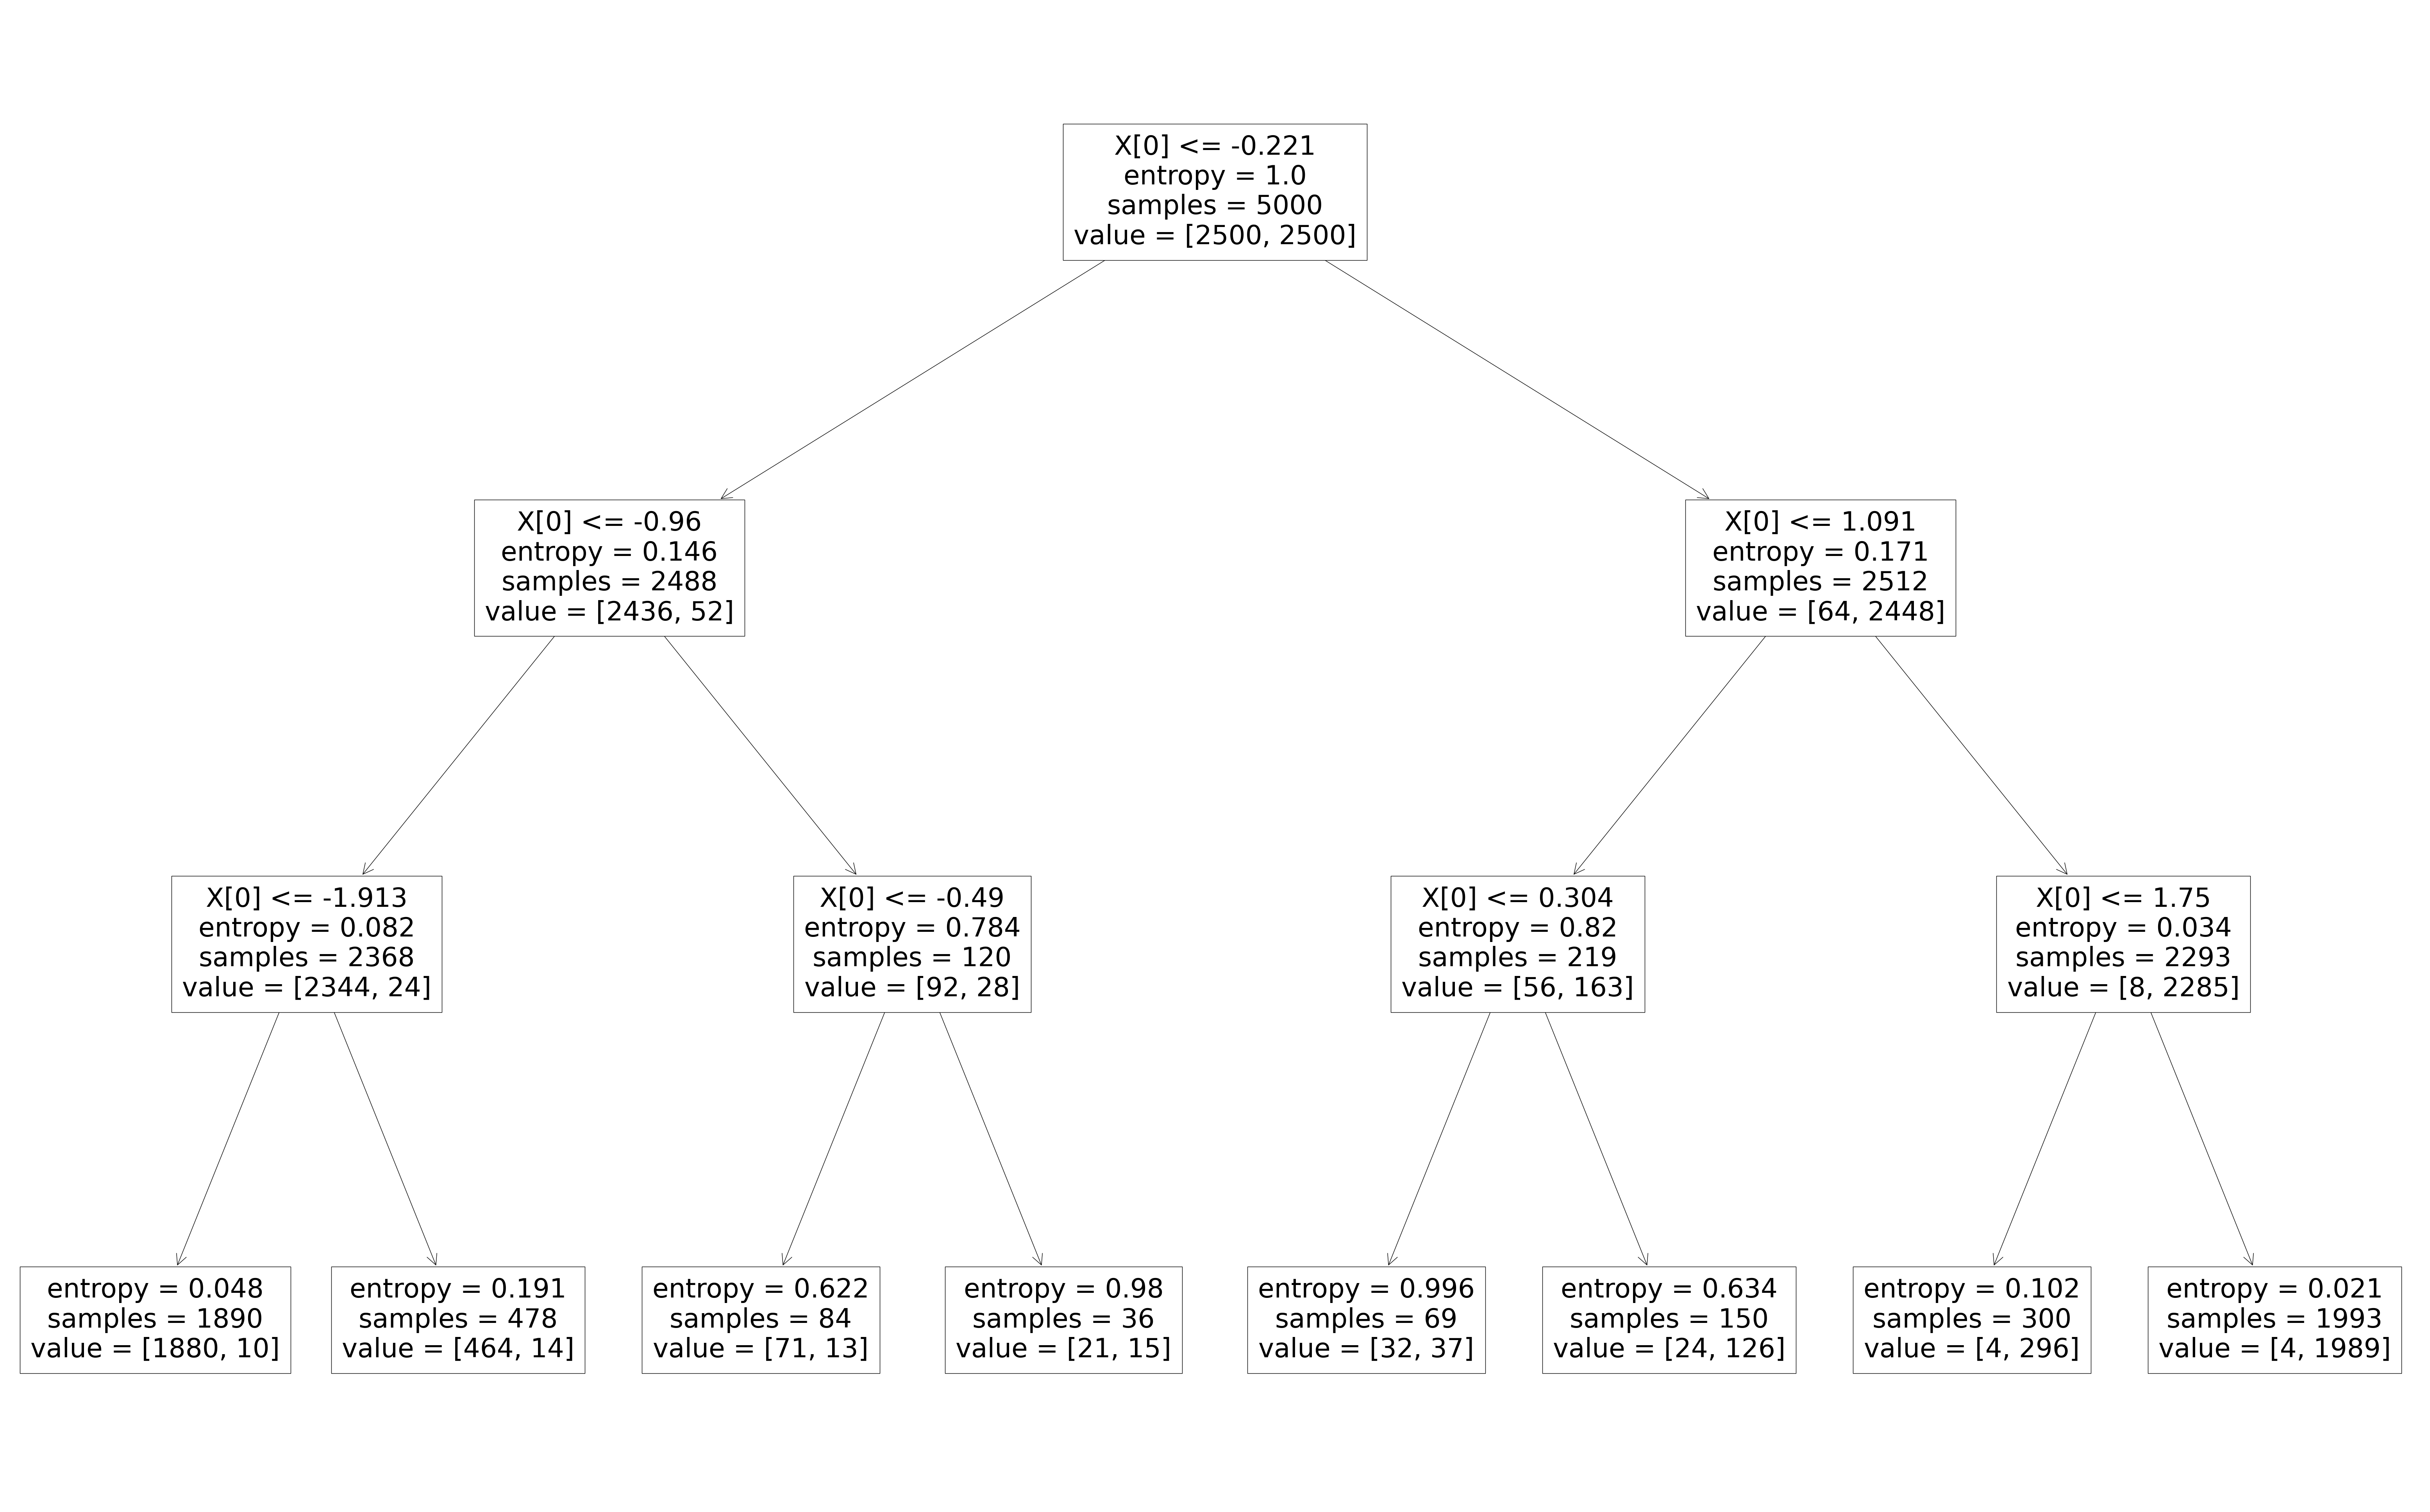

In [58]:
plot_tree(model)